In [1]:
#import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import seaborn as sns
import joblib

#ignore the warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
df = pd.read_csv("../assets/train_data.csv", sep=",")
df.head()

In [3]:
pipe = joblib.load("../model/pipe.joblib")

In [4]:
#these are the features for training
cols = ["Contacts_Count_12_mon","Credit_Limit","Total_Revolving_Bal","Avg_Utilization_Ratio"]

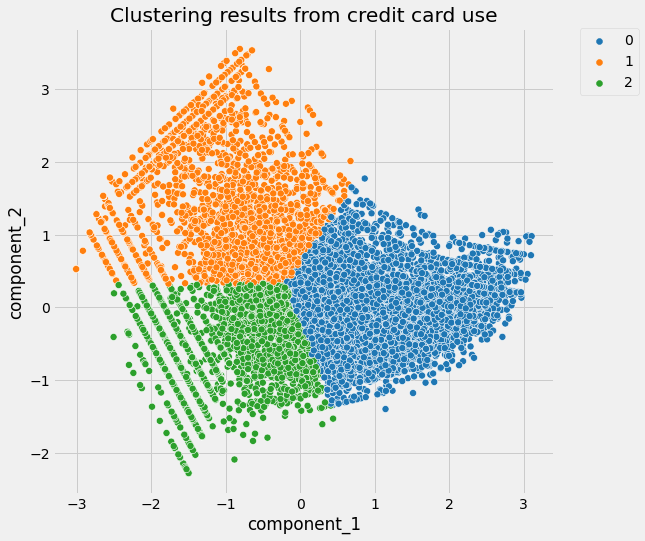

In [5]:
#plot the KMeans
pcadf = pd.DataFrame(
        pipe["preprocessor"].transform(df[cols]),
        columns=["component_1", "component_2"]
    )
   
pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))
   
sp = sns.scatterplot(
        x="component_1", 
        y="component_2",
        s=50,
        data=pcadf,
        hue="predicted_cluster",
        palette='tab10'
    )
   
sp.set_title(
        "Clustering results from credit card use"
    )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
   
plt.show()

In [ ]:
df['cluster'] = pipe['clusterer']['kmeans'].labels_
df.head()

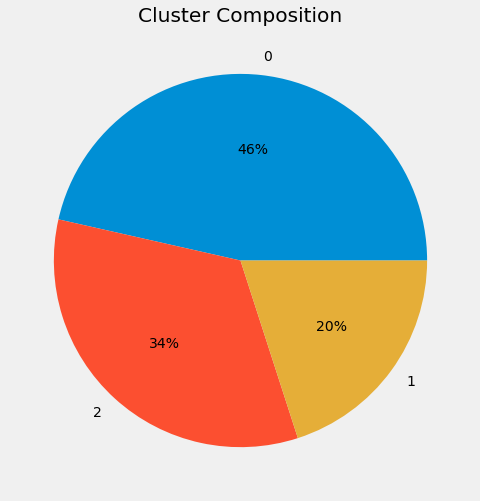

In [7]:
# get composition of 3 clusters with pie chart
fig, axs = plt.subplots(figsize=(12,8))
ax = df['cluster'].value_counts().plot.pie(title='Cluster Composition', autopct='%1.0f%%')
plt.title=False
ax.set_ylabel('')
plt.show()

## Cluster Analysis

<AxesSubplot:title={'center':'Group 3'}>

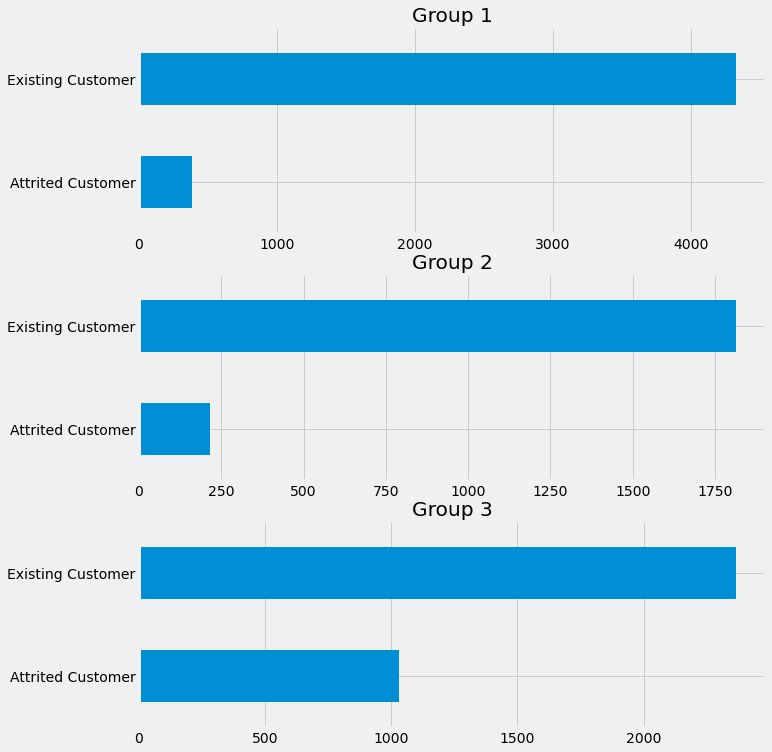

In [8]:
fig, axs = plt.subplots(ncols=1,nrows=3,figsize=(10,12))

df[df['cluster'] == 0]['Attrition_Flag'].value_counts().sort_index().plot.barh(ax=axs[0], title='Group 1')
df[df['cluster'] == 1]['Attrition_Flag'].value_counts().sort_index().plot.barh(ax=axs[1], title='Group 2')
df[df['cluster'] == 2]['Attrition_Flag'].value_counts().sort_index().plot.barh(ax=axs[2], title='Group 3')

### comments: 
Group 3 has more Churn rate

In [ ]:
#scaling the original data for plotting
scaler = StandardScaler()
scaled_cc = pd.DataFrame(scaler.fit_transform(df[cols]), columns=cols)
scaled_cc['cluster'] = pipe['clusterer']['kmeans'].labels_
scaled_cc.head()

<AxesSubplot:title={'center':'Group 3'}>

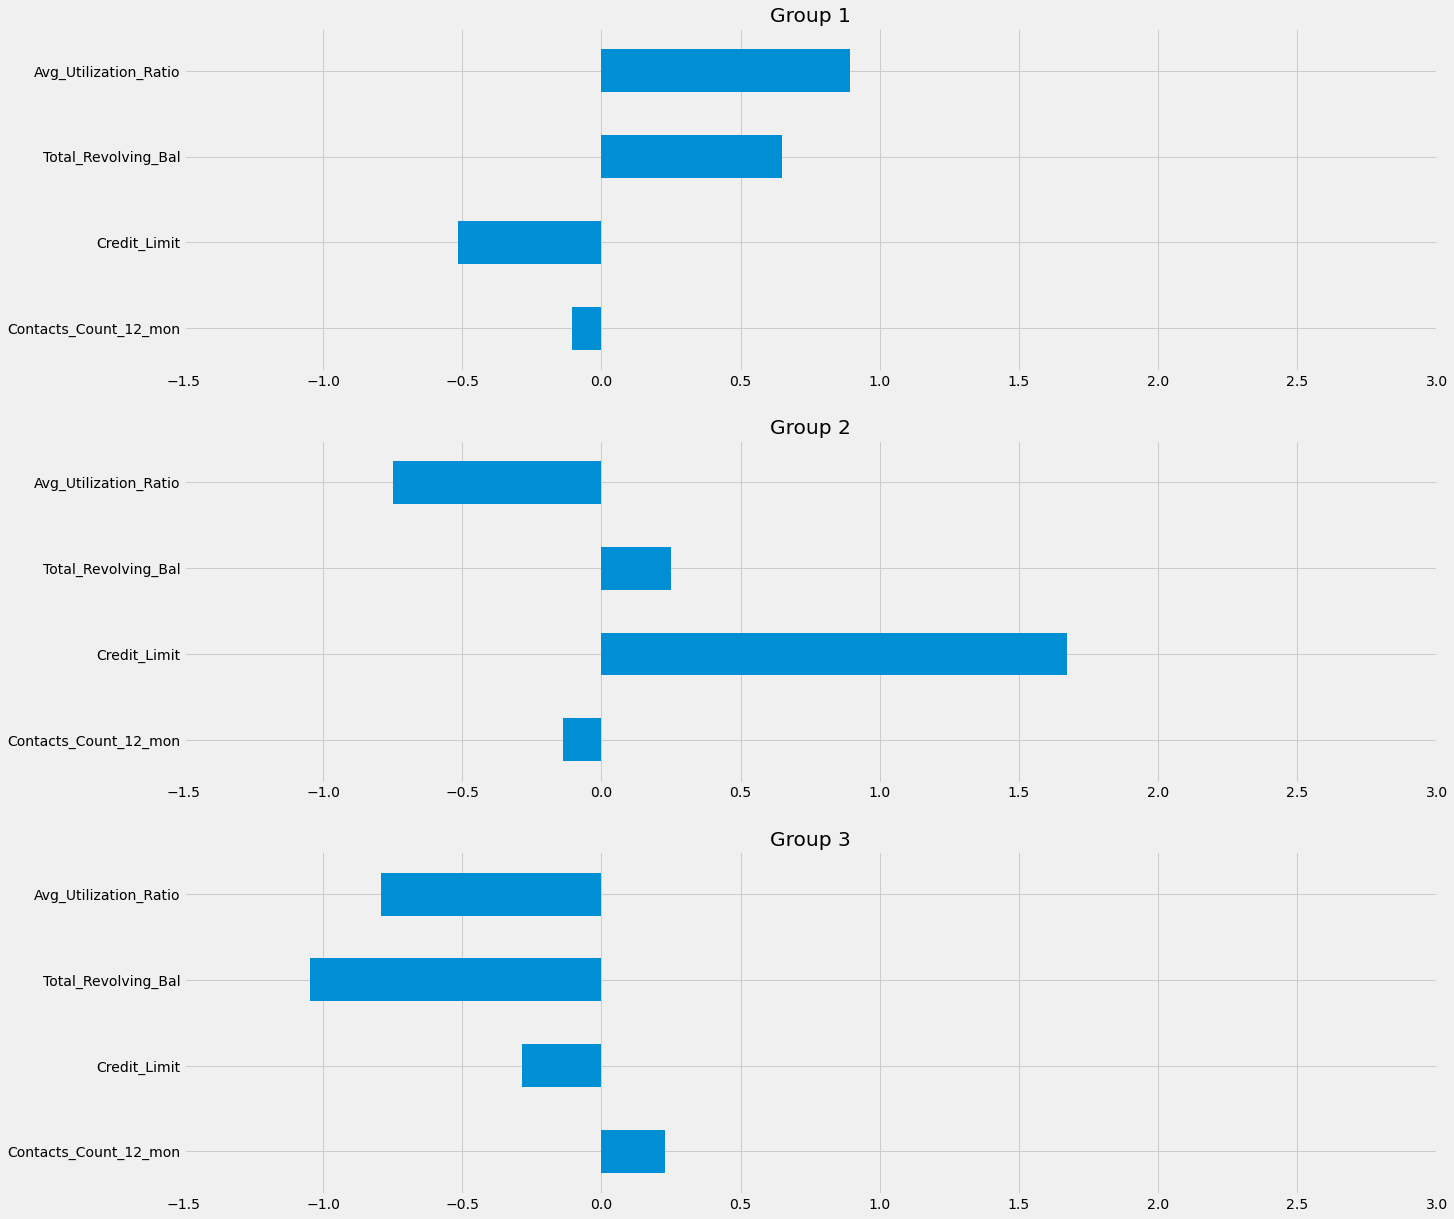

In [19]:
#plot the numerical features distribution in 3 groups
ix, axs = plt.subplots(ncols=1,nrows=3, figsize=(60,50))

scaled_cc[scaled_cc['cluster'] == 0][cols].mean().plot.barh(ax=axs[0], xlim=(-1.5, 3), figsize=(20,20), sharey=True, title='Group 1')
scaled_cc[scaled_cc['cluster'] == 1][cols].mean().plot.barh(ax=axs[1], xlim=(-1.5, 3), figsize=(20,20), sharey=True, title='Group 2')
scaled_cc[scaled_cc['cluster'] == 2][cols].mean().plot.barh(ax=axs[2], xlim=(-1.5, 3), figsize=(20,20), sharey=True, title='Group 3')

## Comments:
* Group 1: Higher utlization ratio, higher revolving balance
* Group 2: Higher Card Limit, lower utlization ratio
* Group 3: Lower utlization ratio, lower card limit,and lower total revolving balance higher contacts

so I define the three groups as below:
* Group 1: frequent card user with higher balance
* Group 2: non-frequent user with high card limit
* Group 3: non-frequent user with lower card limit and more customer contacts

## Plot the feature distribution for each customer group

#### Group 1

<AxesSubplot:title={'center':'Income Category in Group 1'}>

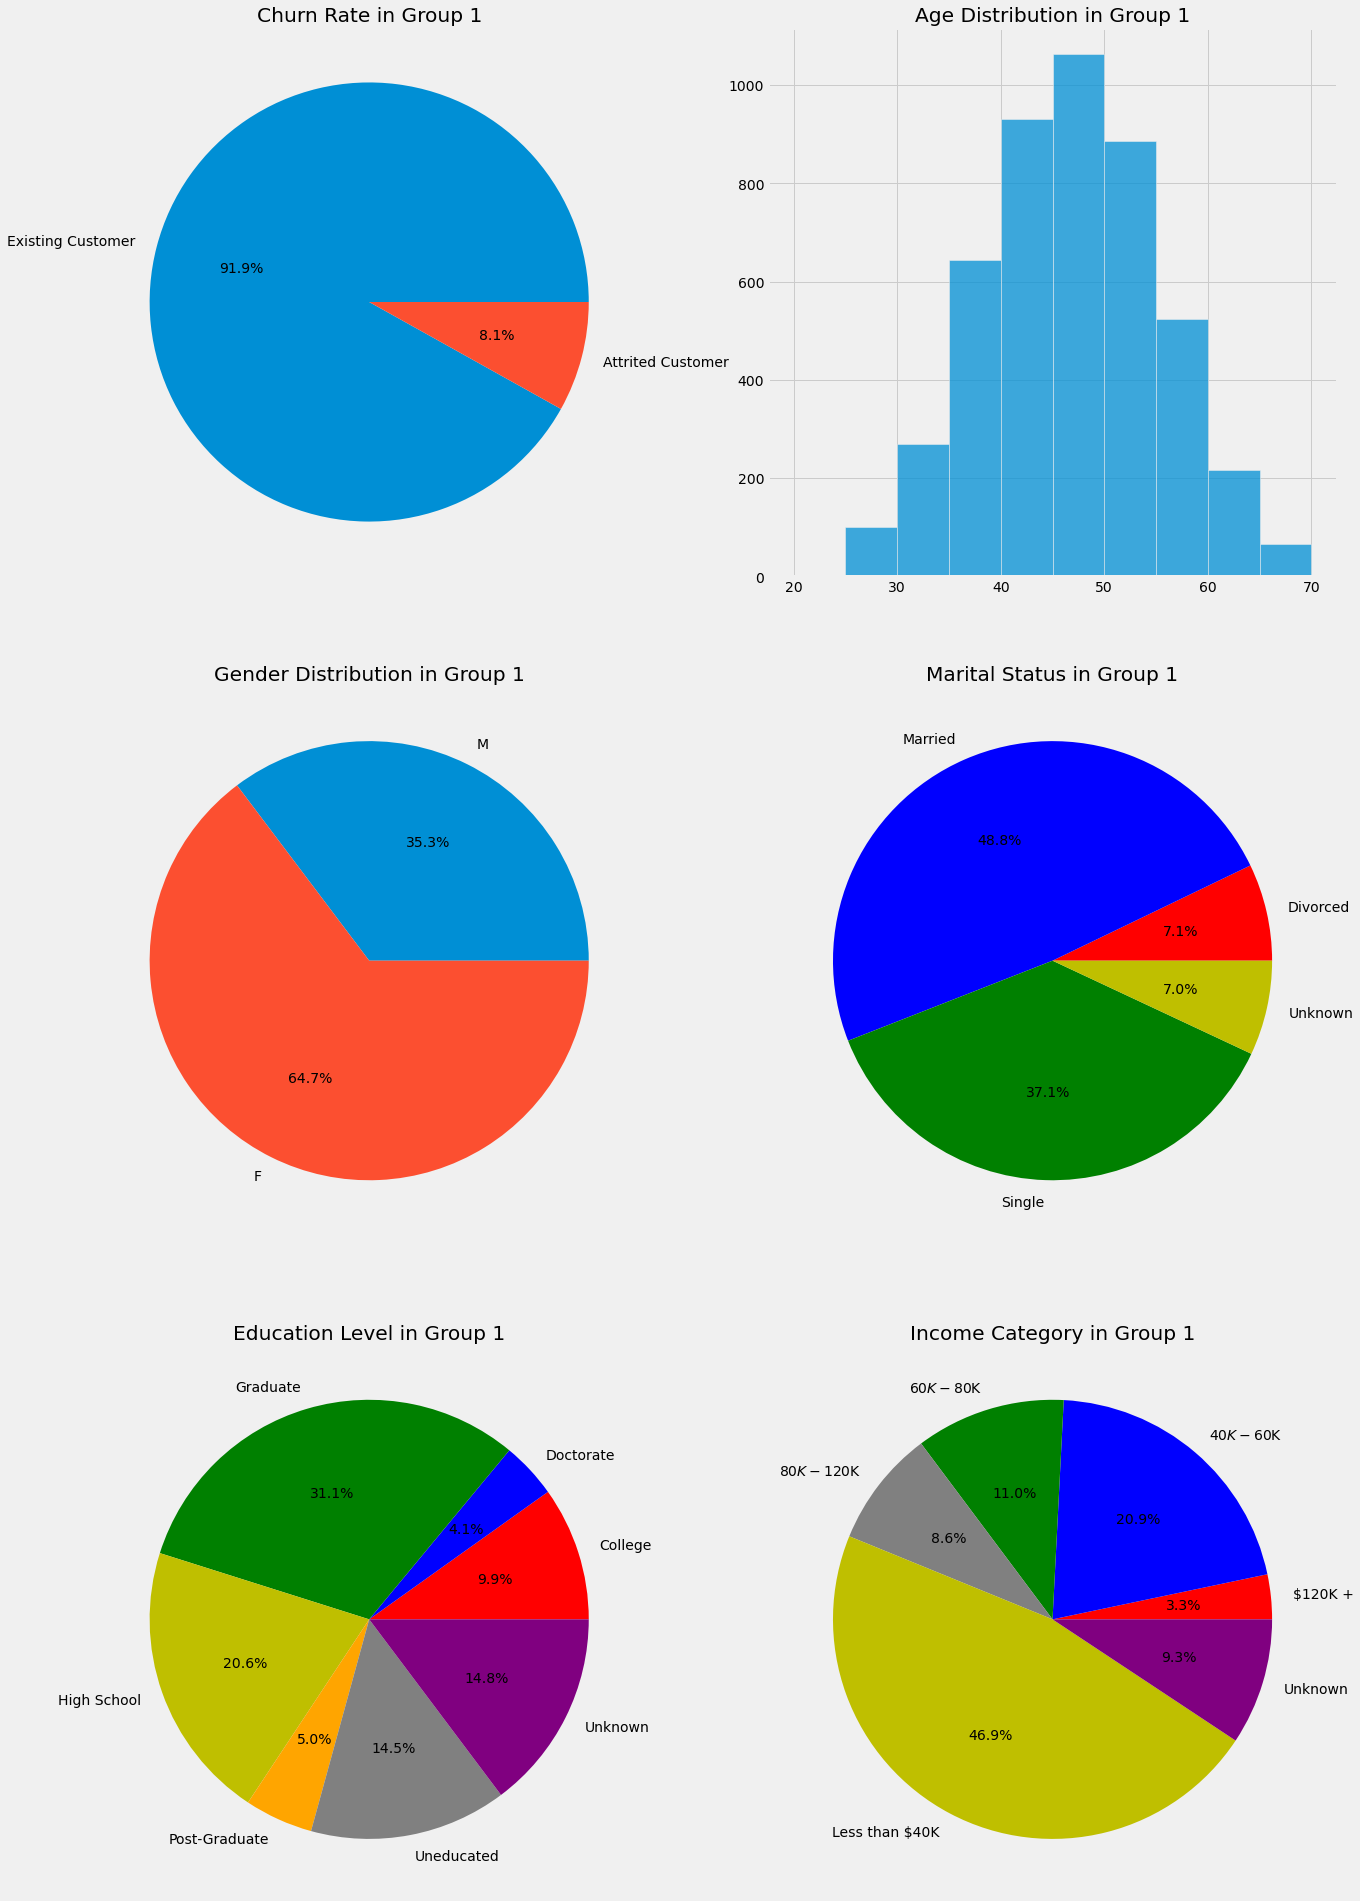

In [11]:
fix, axs = plt.subplots(ncols=2,nrows=3, figsize=(20,32))
sns.histplot(df[df['cluster'] == 0]['Customer_Age'], ax=axs[0,1], binrange=(20,70), binwidth=5).set(title='Age Distribution in Group 1', ylabel='', xlabel='')
df[df['cluster'] == 0]['Attrition_Flag'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[0,0], ylabel='', title='Churn Rate in Group 1', autopct='%.1f%%')
df[df['cluster'] == 0]['Gender'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[1,0], ylabel='', title='Gender Distribution in Group 1', autopct='%.1f%%')
df[df['cluster'] == 0]['Marital_Status'].value_counts().sort_index().plot(kind='pie', ax=axs[1,1], ylabel='', title='Marital Status in Group 1', colors=['r','b','g','y'], autopct='%.1f%%')
df[df['cluster'] == 0]['Education_Level'].value_counts().sort_index().plot.pie(ax=axs[2,0], ylabel='', title='Education Level in Group 1', colors=['r','b','g','y','orange', 'gray','purple'], autopct='%.1f%%')
df[df['cluster'] == 0]['Income_Category'].value_counts().sort_index().plot(kind='pie', ax=axs[2,1], ylabel='', title='Income Category in Group 1', colors=['r','b','g','gray','y','purple'],autopct='%.1f%%')

### Group 2

<AxesSubplot:title={'center':'Income Category in Group 2'}>

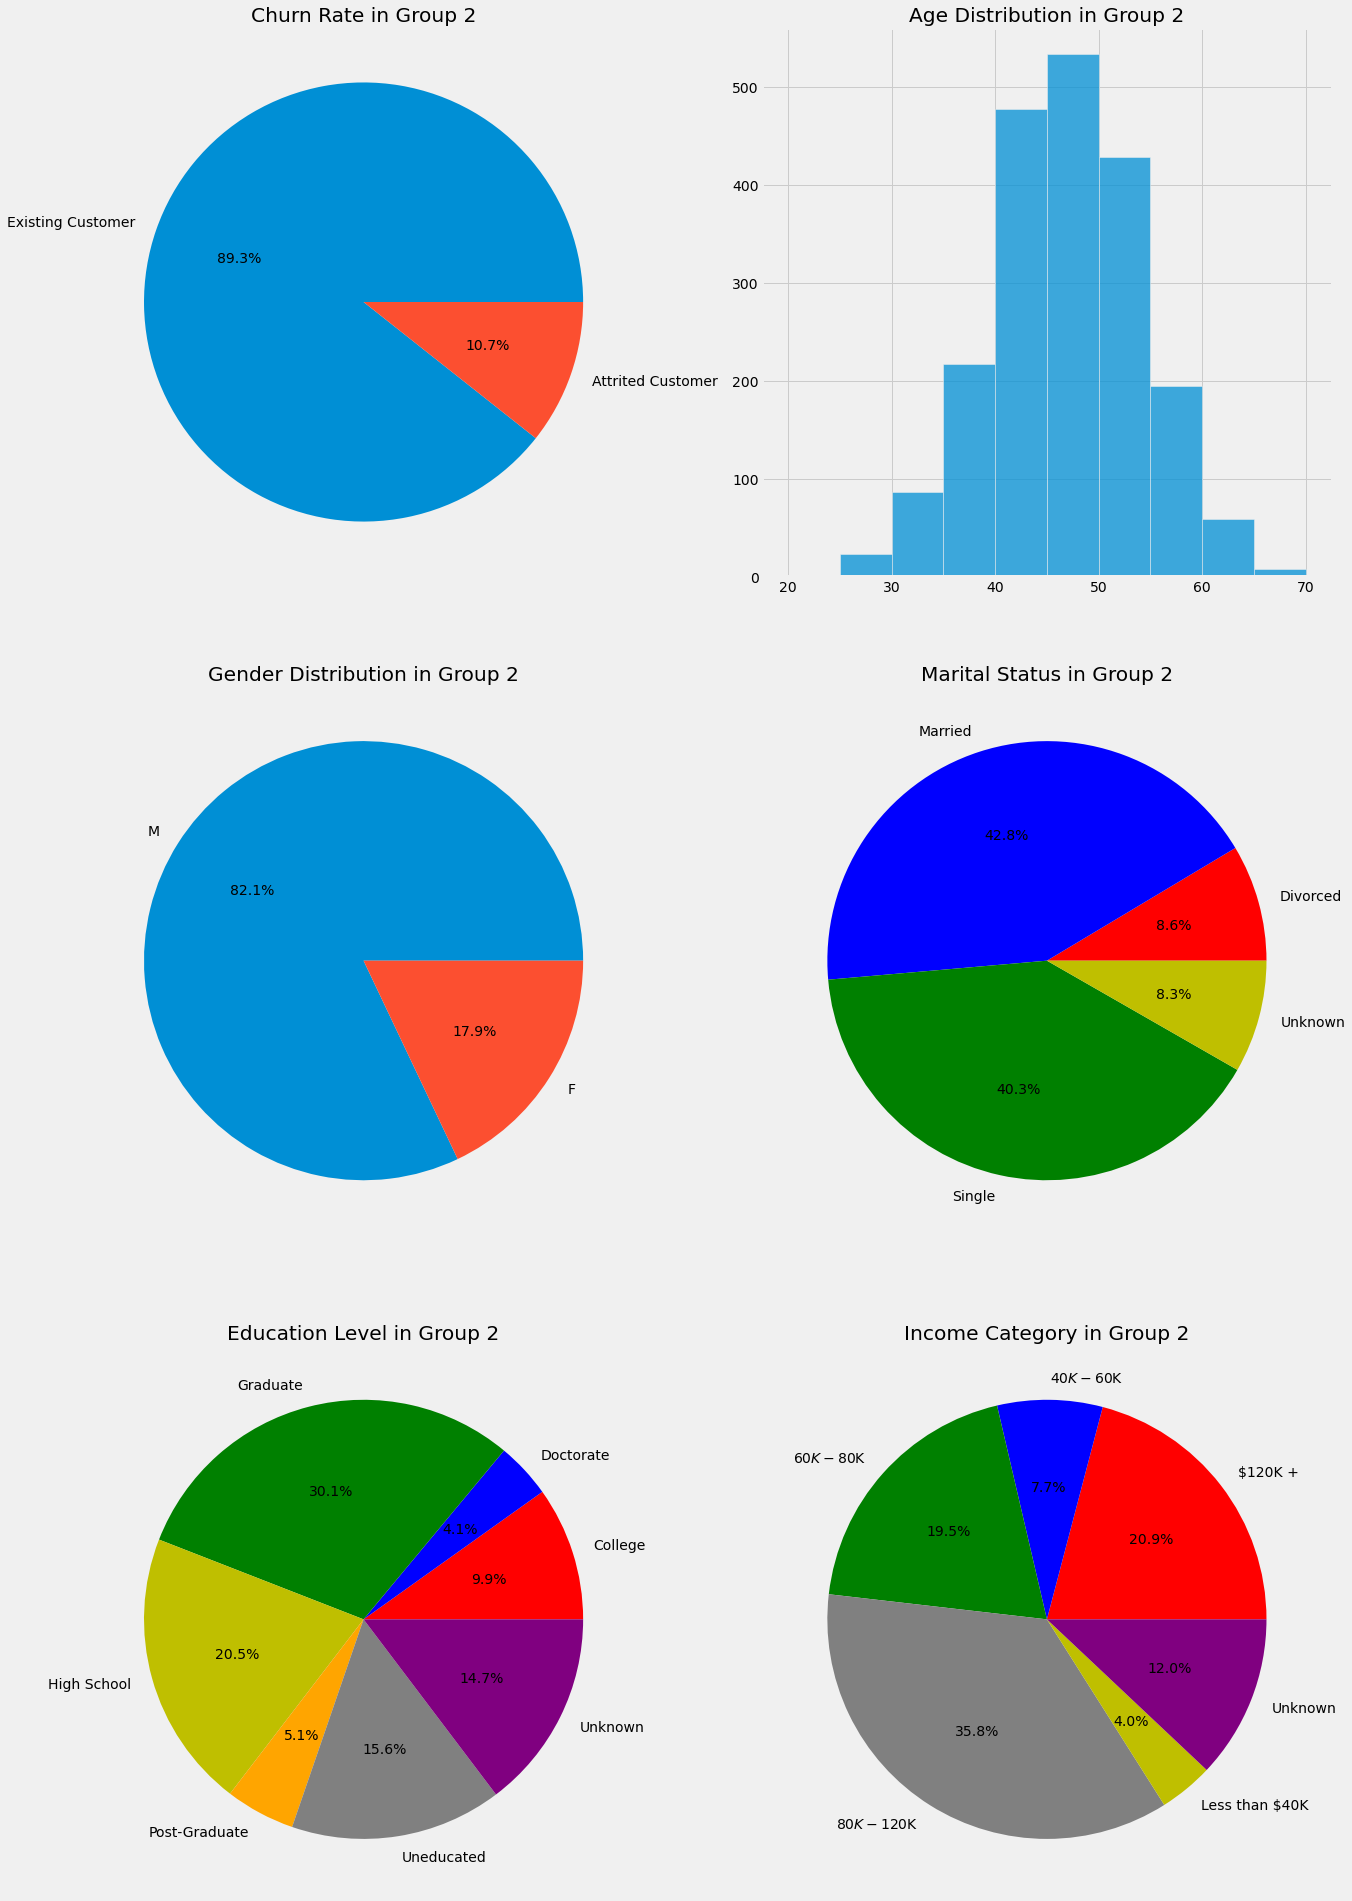

In [12]:
fix, axs = plt.subplots(ncols=2,nrows=3, figsize=(20,32))
sns.histplot(df[df['cluster'] == 1]['Customer_Age'], ax=axs[0,1], binrange=(20,70), binwidth=5).set(title='Age Distribution in Group 2', ylabel='', xlabel='')
df[df['cluster'] == 1]['Attrition_Flag'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[0,0], ylabel='', title='Churn Rate in Group 2', autopct='%.1f%%')
df[df['cluster'] == 1]['Gender'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[1,0], ylabel='', title='Gender Distribution in Group 2', autopct='%.1f%%')
df[df['cluster'] == 1]['Marital_Status'].value_counts().sort_index().plot(kind='pie', ax=axs[1,1], ylabel='', title='Marital Status in Group 2', colors=['r','b','g','y'], autopct='%.1f%%')
df[df['cluster'] == 1]['Education_Level'].value_counts().sort_index().plot.pie(ax=axs[2,0], ylabel='', title='Education Level in Group 2', colors=['r','b','g','y','orange', 'gray','purple'], autopct='%.1f%%')
df[df['cluster'] == 1]['Income_Category'].value_counts().sort_index().plot(kind='pie', ax=axs[2,1], ylabel='', title='Income Category in Group 2', colors=['r','b','g','gray','y','purple'],autopct='%.1f%%')

### Group 3

<AxesSubplot:title={'center':'Income Category in Group 3'}>

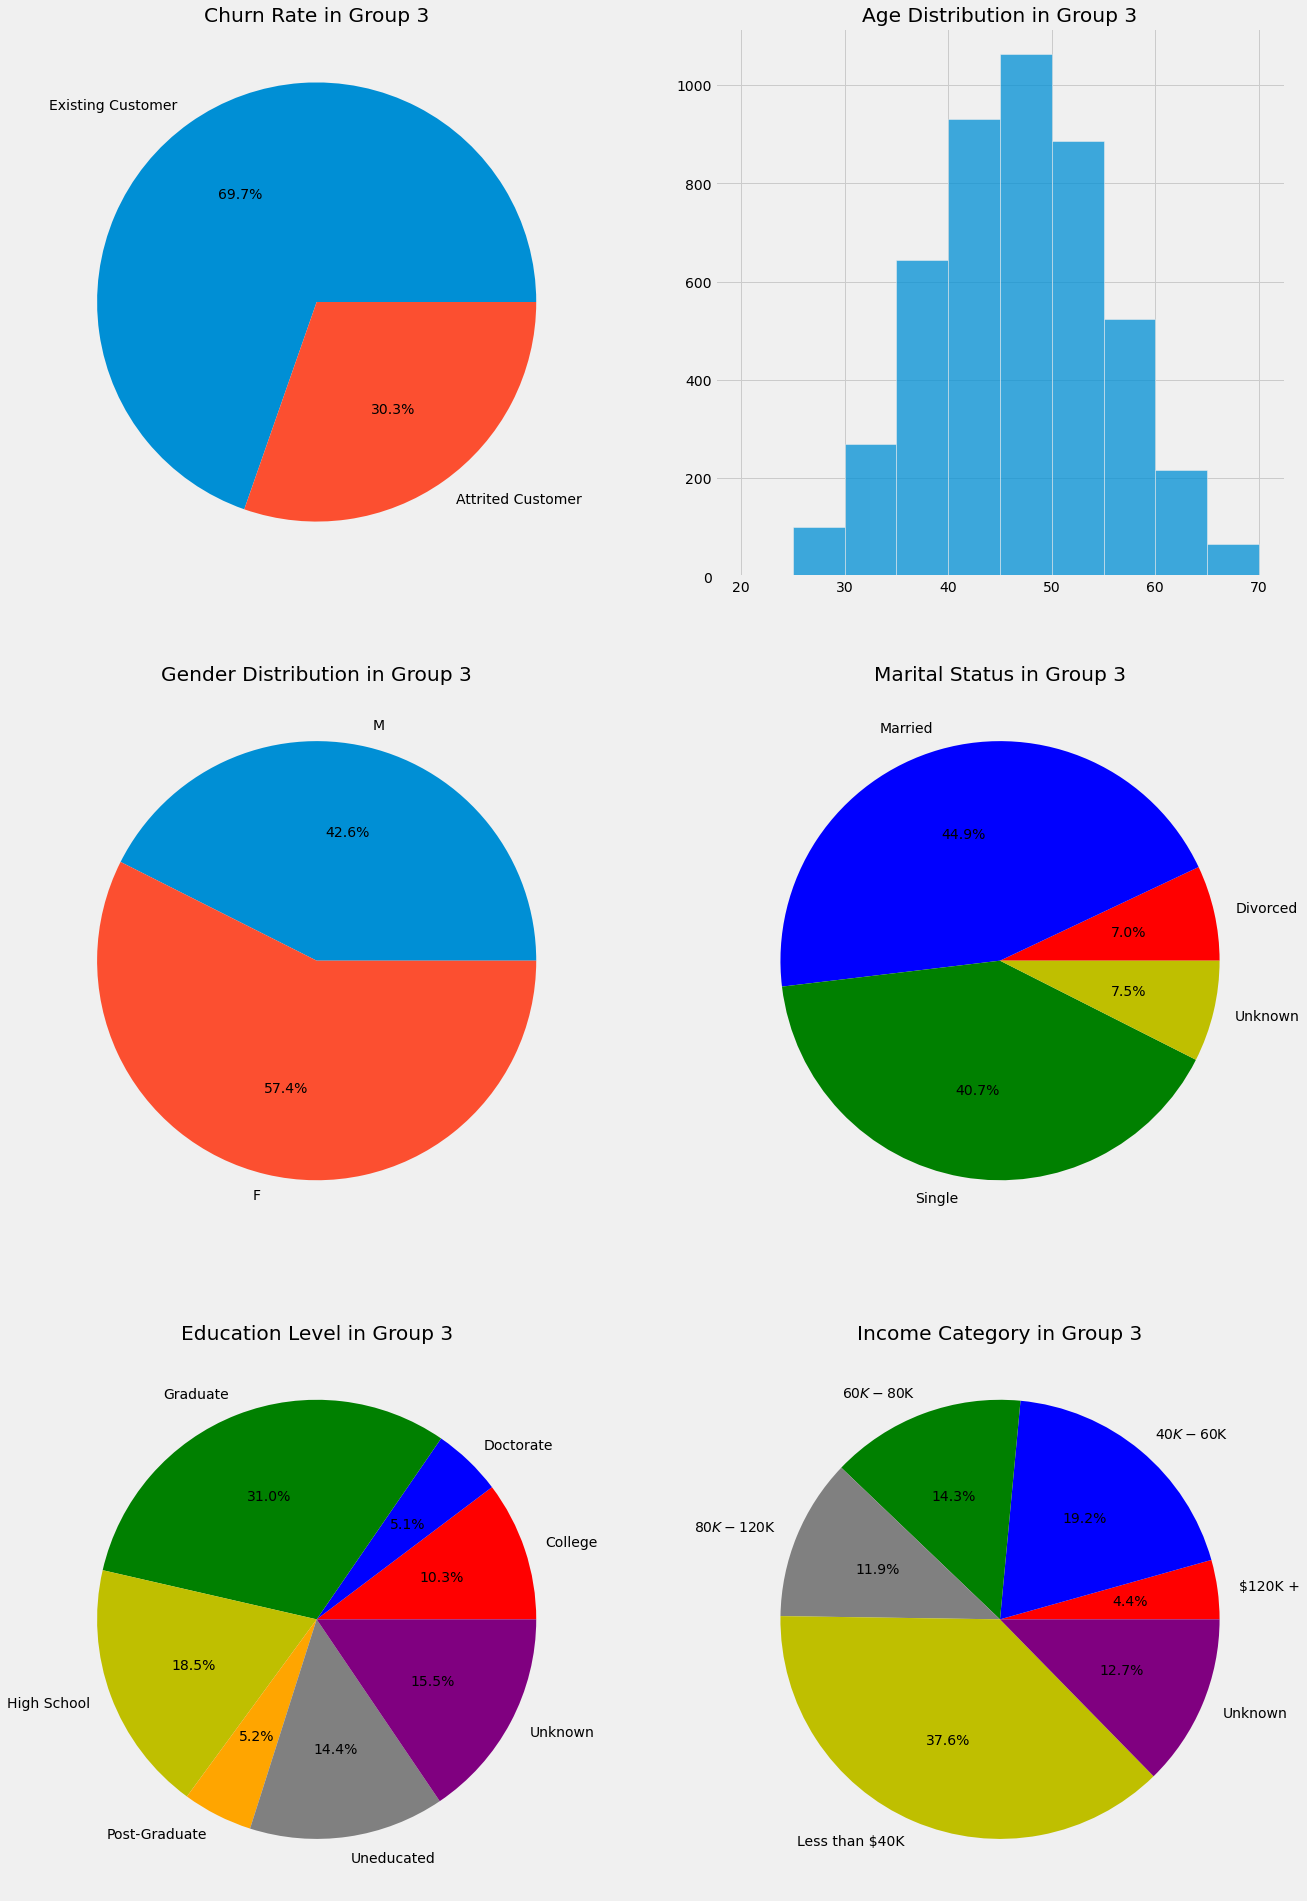

In [13]:
fix, axs = plt.subplots(ncols=2,nrows=3, figsize=(20,32))
sns.histplot(df[df['cluster'] == 0]['Customer_Age'], ax=axs[0,1], binrange=(20,70), binwidth=5).set(title='Age Distribution in Group 3', ylabel='', xlabel='')
df[df['cluster'] == 2]['Attrition_Flag'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[0,0], ylabel='', title='Churn Rate in Group 3', autopct='%.1f%%')
df[df['cluster'] == 2]['Gender'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[1,0], ylabel='', title='Gender Distribution in Group 3', autopct='%.1f%%')
df[df['cluster'] == 2]['Marital_Status'].value_counts().sort_index().plot(kind='pie', ax=axs[1,1], ylabel='', title='Marital Status in Group 3', colors=['r','b','g','y'], autopct='%.1f%%')
df[df['cluster'] == 2]['Education_Level'].value_counts().sort_index().plot.pie(ax=axs[2,0], ylabel='', title='Education Level in Group 3', colors=['r','b','g','y','orange', 'gray','purple'], autopct='%.1f%%')
df[df['cluster'] == 2]['Income_Category'].value_counts().sort_index().plot(kind='pie', ax=axs[2,1], ylabel='', title='Income Category in Group 3', colors=['r','b','g','gray','y','purple'],autopct='%.1f%%')